# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

In [207]:
import numpy as np
import networkx as nx
from networkx.algorithms.shortest_paths.weighted import dijkstra_path, bellman_ford_path
from networkx.algorithms.shortest_paths.astar import astar_path

!pip install igraph
import igraph as ig

import random
import pylab

from timeit import default_timer

import matplotlib.pyplot as plt
from plotly import express as px

# !pip install scipy==1.8.0

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


## I. Generate a random adjacency matrix for a simple undirected weighted graph of $100$ vertices and $500$ edges with assigned random positive integer weights (note that the matrix should be symmetric and contain only 0s and weights as elements). Use `Dijkstra`'s and `Bellman-Ford` algorithms to find shortest paths between a random starting vertex and other vertices. Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex and calculate the average time required for the paths search of each algorithm. Analyse the results obtained.

In [4]:
VERTICES = 100
EDGES = 500

In [13]:
# get_adjacency_matrix ...
def get_adjacency_matrix_Igraph(node_number, edges_number):
    random_graph = ig.Graph.Erdos_Renyi(n=node_number, m=edges_number)
    print(random_graph)
    return random_graph.get_adjacency()

In [14]:
AM = get_adjacency_matrix_Igraph(
    VERTICES,
    EDGES
)

IGRAPH U--- 100 500 --
+ edges:
  0 --  24  48  85  89  95  96
  1 --   8  20  29  48  57  59  95
  2 --   6  12  15  36  37  47  83  90
  3 --  24  49  56  59  64  66  67  74  85  95  97  98
  4 --  29  38  44  57  96  99
  5 --  17  32  41  58  61  64  86
  6 --   2  26  27  31
  7 --  11  16  22  35  36  44  46  50  54  63  64  66  74  84  85
  8 --   1  17  24  43  49  53  56  62  84  96  98
  9 --  44  68  72  75  85  86
 10 --  14  15  19  44  46  82
 11 --   7  31  42  58  66  75  81  94
 12 --   2  18  22  39  43  53  54  68  89
 13 --  22  29  46  48  79  89  95
 14 --  10  23  27  42  59  92  93
 15 --   2  10  18  25  26  31  33  35  37  38  45  67  78  87  89  99
 16 --   7  24  31  33  37  41  42  47  48  58  74  95
 17 --   5   8  79  84  88  90
 18 --  12  15  30  32  36  50  67  82  89  96
 19 --  10  26  27  37  40  48  56  66  68  71  96
 20 --   1  26  29  32  41  50  62  64  72  96  98
 21 --  26  29  37  40  47  59  61  63  76  86
 22 --   7  12  13  36  40  44  47

In [15]:
random_graph = ig.Graph.Erdos_Renyi(n=VERTICES, m=EDGES)

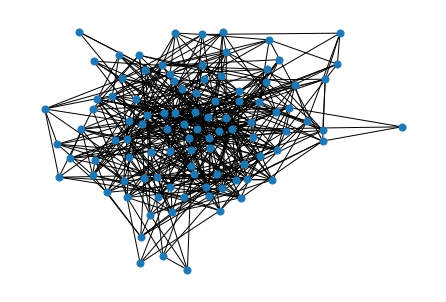

In [141]:
# Convert igraph to NetworkX to use methods

rg_NX = random_graph.to_networkx()
nx.draw(rg_NX, node_size=50)
plt.show()

In [140]:
# Convert igraph to NetworkX to use methods

G = nx.Graph(graph)
rg_NX = nx.random_layout(G)

# rg_NX = random_graph.to_networkx()

labels = {}

for k in range(VERTICES):
  labels[k] = "{0}".format(k)
# nx.draw_networkx_labels(G, rg_NX, labels, font_size=8, font_color="black")
# nx.draw(G, rg_NX, node_size = 300, node_color = "lightblue", edge_color = "black")

In [21]:
# random starting vertex and other vertices
STARTING_VERTEX = np.random.randint(0, VERTICES)
END_VERTEX = np.random.randint(0, VERTICES)

print(f"STARTING_VERTEX={STARTING_VERTEX}\nEND_VERTEX={END_VERTEX}")

STARTING_VERTEX=15
END_VERTEX=44


### Dijkstra's and Bellman-Ford algorithms

In [25]:
def Dijkstra(graph, startV, endV):
    return dijkstra_path(graph, startV, endV)


def BellmanFord(graph, startV, endV):
    return bellman_ford_path(graph, startV, endV)

In [56]:
def MeasuretheTimeRequired(attempts, algorithm, graph, startV, endV):
    measured_times = []
    for i in range(attempts):
        start_time = default_timer()
        algorithm(graph, startV, endV)
        measured_times.append(default_timer() - start_time)    
        
        return f"Algorithm {algorithm. __name__} = {np.array(measured_times, dtype=np.float64).mean(axis=0)}"

In [61]:
MeasuretheTimeRequired(10, Dijkstra, rg_NX, STARTING_VERTEX,END_VERTEX)

'Algorithm Dijkstra= 0.0006955230001040036'

In [62]:
MeasuretheTimeRequired(10, BellmanFord, rg_NX, STARTING_VERTEX,END_VERTEX)

'Algorithm BellmanFord= 0.0010670960000425112'

## II. Generate a $10 \times 20$ cell grid with $40$ obstacle cells. Choose two random nonobstacle cells and find a shortest path between them using `A* algorithm`. Repeat the experiment 5 times with different random pair of cells. Analyse the results obtained.

In [211]:
def printGrid(GRID, cells_pair_1, cells_pair_2):
    plt.figure(figsize=(10, 10))
    pos = dict((n, n) for n in GRID.nodes())
    labels = dict(((i, j), i * 10 + j) for i, j in GRID.nodes())
    nx.draw_networkx(GRID, pos=pos, labels=labels)
    path = astar_path(GRID, cells_pair_1, cells_pair_2)
    print(path)
    nx.draw_networkx_nodes(GRID, pos, nodelist=path, node_color='r')

In [223]:
# plt.figure(figsize=(10, 10))
GRID_WIDTH = 10
GRID_LENGTH = 20
GRID_OBSTACLE_CELLS = 40


GRID = nx.grid_2d_graph(GRID_WIDTH, GRID_LENGTH)


edges_to_delete = np.random.randint(0, GRID_WIDTH, size=(GRID_OBSTACLE_CELLS, 2))
edges_to_delete = list(map(tuple, edges_to_delete))
GRID.remove_nodes_from(edges_to_delete)

[(3, 3), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (7, 1), (7, 0)]


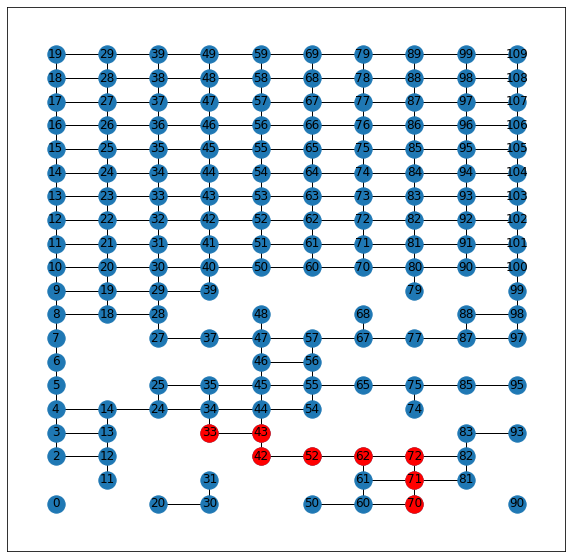

In [224]:
printGrid(GRID, (3, 3), (7, 0))

[(0, 9), (1, 9), (2, 9), (2, 8), (2, 7), (3, 7), (4, 7), (5, 7), (5, 6), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)]


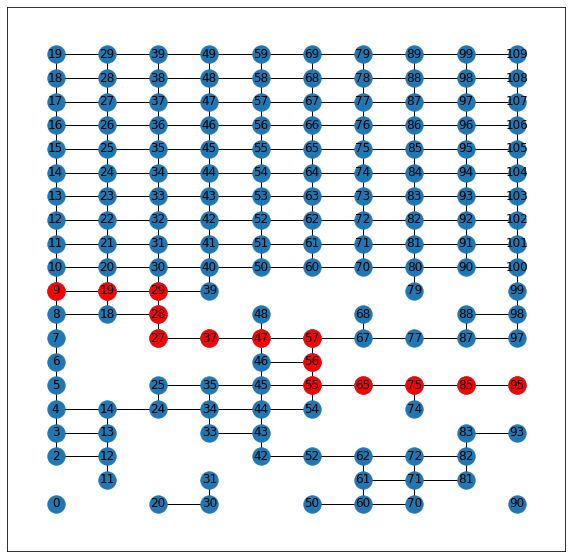

In [225]:
printGrid(GRID, (0, 9), (9, 5))

In [226]:
printGrid(GRID, (0, 19), (9, 0))

NetworkXNoPath: NetworkXNoPath: Node (9, 0) not reachable from (0, 19)

[(6, 14), (5, 14), (4, 14), (3, 14), (2, 14), (2, 13), (2, 12), (2, 11), (2, 10), (2, 9), (2, 8), (2, 7), (3, 7), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (5, 2), (6, 2), (6, 1), (6, 0)]


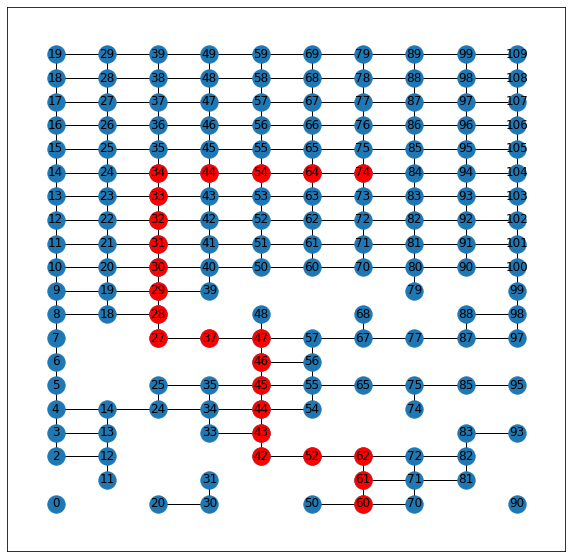

In [231]:
printGrid(GRID, (6, 14), (6, 0))

[(1, 11), (2, 11), (2, 12)]


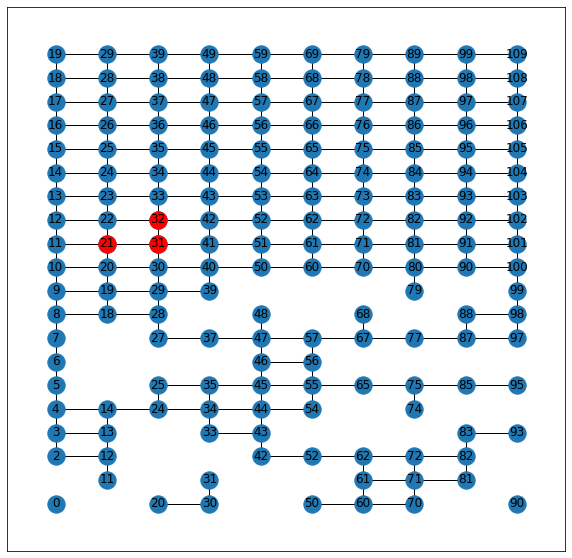

In [234]:
printGrid(GRID, (1, 11), (2, 12))